# Ex 8

In [59]:
# Import von python libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
cm = 1/2.54

In [60]:
# helper function for 2D plot. You don't need to do anything here. This function moves an array by half a space so the 2D plot function further down in the notebook is correctly aligned with the array endpoints. 
def remesh(array):
    dx = array[1]-array[0]
    array = array-dx # shift by one unit to the left
    return np.hstack((array, array[-1]+dx)) # add one element on the right and return


## Aufg. 1: Fit by trying out parameters

First, we create data which roughly follows a linear distribution by adding random numbers picked from a normal distribution to a linear function. 

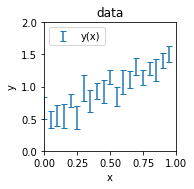

In [61]:
# create data
np.random.seed(1) # so we always get the same random data
x = np.linspace(0,1,20, endpoint=False) # x values
y = x + np.random.normal(loc=0, scale=0.1, size=len(x)) + 0.5 # y values with some gaussian randomness (mu=0, sigma=0.1) and offset of 0.5
sig = 0.1 + np.random.random(len(x))*0.1 # sigma values
fig, ax = plt.subplots(1,1,figsize=(6*cm, 6*cm))
ax.errorbar(x, y, yerr=sig, linestyle='', capsize=3, label='y(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('data')
ax.set_xlim([0,1])
ax.set_ylim([0,2])
ax.legend(loc='upper left')
plt.show()

Now we compute the sum of the residuals (the sum of squared deviations between fit function and data) for a range of guesses for a0 and a1 and plot it in a 2D logscale plot with a0 and a1 on the axes. 
Compute the residuals for the given range of a0 and a1 guesses. Can you do it in a single line without an external for... loop? Can you do it without any for loop at all?

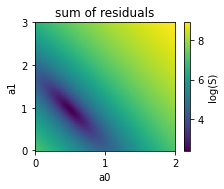

In [62]:
# plot sum of residuals for different a0 and a1
# create arrays of values for a1 and a0 to try out
a0_try = np.linspace(0,2,201)
a1_try = np.linspace(0,3,301)
# ============== write here
S = np.zeros((len(a1_try), len(a0_try)))
for i, a1_i in enumerate(a1_try):
    for j, a0_j in enumerate(a0_try):
        S[i,j] = np.sum(1/sig**2 * (y - (a0_j + a1_i*x))**2)

# or 
S = np.sum(1/sig**2 * (y[np.newaxis, :] - a0_try[:, np.newaxis] - a1_try[:,np.newaxis,np.newaxis]*x[np.newaxis, :])**2, axis=-1)

# ==============

# now plot log(S)
fig, ax = plt.subplots(1,1, figsize=(8*cm, 6*cm))
# shape into a meshgrid for 2D plot
a0_grid, a1_grid = np.meshgrid(remesh(a0_try), remesh(a1_try))
# plot log(S)
c = ax.pcolor(a0_grid, a1_grid, np.log(S))
# cosmetics
fig.colorbar(c, ax=ax, label='log(S)')
ax.set_xlabel('a0')
ax.set_ylabel('a1')
ax.set_title('sum of residuals')
plt.show()

Now we find the minimum of S and determine the corresponding values of a0 and a1. Use numpy functionality to do this. 

In [63]:
# ============== write here
# by looking for the index with the minimum value of S, we can find the optimum for a0 and a1
min_index_S = np.argmin(S) # this function returns the index of the flattened S array with the minimum value of S
# now we recover the correct a0 and a1 fit values
a0_index = min_index_S % len(a0_try)
a1_index = min_index_S // len(a0_try)
a0_fit = a0_try[a0_index]
a1_fit = a1_try[a1_index]
# ==============
print(f'a0={a0_fit:.1f}') # should be 0.5
print(f'a1={a1_fit:.1f}') # should be 1.0

a0=0.5
a1=1.0


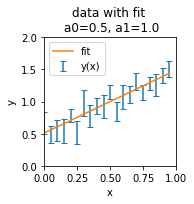

In [64]:
# finally, we plot the data with the acquired fit values 
fig, ax = plt.subplots(1,1,figsize=(6*cm, 6*cm))
ax.errorbar(x, y, yerr=sig, linestyle='', capsize=3, label='y(x)')
ax.plot(x, a0_fit + a1_fit*x, label='fit')
ax.set_title('data with fit \n a0=%.1f, a1=%.1f' % (a0_fit, a1_fit))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([0,1])
ax.set_ylim([0,2])
ax.legend(loc='upper left')
plt.show()

While this worked well in our little example, think about reasons this is a limited approach. 
#=============
We don't always know the initial parameters. 
For several parameters, this quickly becomes inefficient. 
#=============

## Aufg. 2: Analytical fit

We create a system of equations in matrix form which lets us compute the optimal fit parameter by inverting the matrix equation. Create the normal matrix N and the solution vector Y. How can we get the covariance matrix C?

In [65]:
# analytical fit
w = 1/sig**2
N = np.zeros((2,2))
Y = np.zeros((2,1))
# ============== write here
# normalmatrix 2x2
N[0,0] = np.sum(w)
N[0,1] = np.sum(w * x)
N[1,0] = np.sum(w * x)
N[1,1] = np.sum(w * x**2)
# solution vector
Y[0] = np.sum(w * y)
Y[1] = np.sum(w * x * y)
# ==============

# mit der Lösung 
a = np.linalg.inv(N)@Y 
# A@B is a shorthand for np.dot(A,B) and retuns the matrix product, while A*B attempts elementwise multiplication
print("solution vector:")
print(a)
# und der Covarianz-Matrix
# ============ write here
C = np.linalg.inv(N)
# ============

print("Covarianz Matrix:")
print(C)

solution vector:
[[0.51033601]
 [0.97531313]]
Covarianz Matrix:
[[ 0.00400239 -0.0058887 ]
 [-0.0058887   0.01135308]]


And we plot the data with the computed fit. Add the right calculation for the computation of the errors of the fit parameters. 

In [66]:
# plot again the data with the acquired fit values 
# ============= write here
a0_error = np.sqrt(C[0,0]) 
a1_error = np.sqrt(C[1,1])
# =============

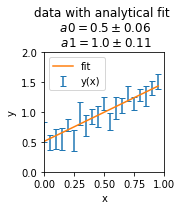

In [67]:
# plotting the data with the fit. 
fig, ax = plt.subplots(1,1,figsize=(6*cm, 7*cm))
ax.errorbar(x, y, yerr=sig, linestyle='', capsize=3, label='y(x)')
ax.plot(x, a[0,0] + a[1,0]*x, label='fit')
ax.set_title('data with analytical fit \n $a0=%.1f \pm %.2f$ \n $a1=%.1f \pm %.2f$' % (a[0], a0_error, a[1], a1_error ))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([0,1])
ax.set_ylim([0,2])
ax.legend(loc='upper left')
fig.tight_layout(pad=0.1)
plt.show()

## Aufg. 3

Now we repeat the process from Aufg. 2, but our data roughly follows a third order polynomial. First we create and plot the data. 

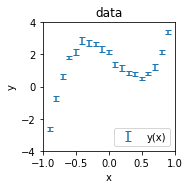

In [68]:
# repeat with third order function
# create data
np.random.seed(1) # so we always get the same random data
x = np.linspace(-1,1,20, endpoint=False) # x values
a0, a1, a2, a3 = 2.0, -4.0, -2.0, 9.0

#======================= write here
y = a0 + a1*x + a2*x**2 + a3*x**3 + np.random.normal(loc=0, scale=0.1, size=len(x)) # y values with some gaussian randomness (mu=0, sigma=0.3) and offset of 0.5
#=======================

sig =  0.1 + np.random.random(len(x))*0.1 # sigma values
fig, ax = plt.subplots(1,1,figsize=(6*cm, 6*cm))
ax.errorbar(x, y, yerr=sig, linestyle='', capsize=3, label='y(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('data')
ax.set_xlim([-1,1])
ax.set_ylim([-4,4])
ax.legend(loc='lower right')
plt.show()

Again, create the matrix equation system by creating the normal matrix N and the solution vector Y as well as the covariance matrix C, but this time for a third order polynomial. 

In [69]:
# create matrix system for third order polynomial
polyOrder = 3
n = polyOrder + 1
N = np.zeros((n, n))
Y = np.zeros((n,1))
# ============== write here
w = 1/sig**2
for row in range(n):
    Y[row] = np.sum(w * x**row * y)
    for column in range(n):
        N[row, column] = np.sum(w * x**(row + column))
# ==============
# mit der Lösung
a = np.linalg.inv(N)@Y 
print("solution vector:")
print(a)
# und der Covarianz-Matrix
# ============ write here
C = np.linalg.inv(N)
# ============
print("Covarianz Matrix:")
print(C)

solution vector:
[[ 1.99021893]
 [-4.04237426]
 [-1.97282609]
 [ 9.05343547]]
Covarianz Matrix:
[[ 2.25600629e-03 -2.86339355e-04 -3.86820132e-03 -2.07528899e-05]
 [-2.86339355e-04  1.79041199e-02 -1.45506663e-03 -2.57759046e-02]
 [-3.86820132e-03 -1.45506663e-03  1.17374759e-02  3.47184071e-03]
 [-2.07528899e-05 -2.57759046e-02  3.47184071e-03  4.41827767e-02]]


and we plot the fit result with the data. What is the correct expression for the fit parameter errors?

In [70]:
#===================== write here
a0_error = np.sqrt(C[0,0])
a1_error = np.sqrt(C[1,1])
a2_error = np.sqrt(C[2,2])
a3_error = np.sqrt(C[3,3])
#=====================

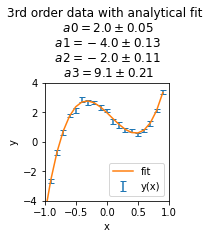

In [71]:
# plot again the data with the acquired fit values 

fig, ax = plt.subplots(1,1,figsize=(6*cm, 8*cm))
ax.errorbar(x, y, yerr=sig, linestyle='', capsize=3, label='y(x)')
ax.plot(x, a[0,0] + a[1,0]*x + a[2,0]*x**2 + a[3,0]*x**3, label='fit')
ax.set_title('3rd order data with analytical fit \n $a0=%.1f \pm %.2f$ \n $a1=%.1f \pm %.2f$ \n $a2=%.1f \pm %.2f$ \n $a3=%.1f \pm %.2f$' % (a[0], a0_error, a[1], a1_error, a[2], a2_error, a[3], a3_error))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([-1,1])
ax.set_ylim([-4,4])
ax.legend(loc='lower right')
fig.tight_layout(pad=0.1)
plt.show()


## Aufg. 4

Finally, fit the data from Aufg. 1 and 2 with a second order polynomial. Then compute the covariance matrix. What do you notice?

In [72]:
# finally, fit the linear data with a second order function and check the covariance
# create data
x = np.linspace(0,1,20, endpoint=False) # x values
y = x + np.random.normal(loc=0, scale=0.1, size=len(x)) + 0.5 # y values with some gaussian randomness (mu=0, sigma=0.3) and offset of 0.5
sig = 0.1 + np.random.random(len(x))*0.1 # sigma values
# create matrix system
# =========== write here
polyOrder = 2
n = polyOrder + 1
N = np.zeros((n, n))
Y = np.zeros((n, 1))
w = 1/sig**2
for row in range(n):
    Y[row] = np.sum(w * x**row * y)
    for column in range(n):
        N[row, column] = np.sum(w * x**(row + column))
# ===========
# mit der Lösung
a = np.linalg.inv(N)@Y 
print("solution vector:")
print(a)
# und der Covarianz-Matrix
# ============ write here
C = np.linalg.inv(N)
# ============
print("Covarianz Matrix:")
print(C)

solution vector:
[[ 0.45152565]
 [ 1.31156083]
 [-0.32330947]]
Covarianz Matrix:
[[ 0.00993652 -0.03922035  0.03260595]
 [-0.03922035  0.2142499  -0.20325063]
 [ 0.03260595 -0.20325063  0.20619763]]


In [ ]:
# The non-diagonal covariance matrix elements [2,1] and [1,2] are about as large as the values for a1 and a2. This indicates that the linear and quadratical terms in the fit function have a strong interdependence or, in other words, we overfit the function. 